- jupyter notebook 에서 잘 안되기 때문에 코랩에서  
  - [위치] 05_파이썬 라이브러리 - unit06_konlpy   
  - 실습1 제출 : [멋쟁이사자처림] 05_멋사_konlpy_텍스트분석실습_0701  

In [1]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [2]:
### 나눔 고딕 설치
!apt-get update -qq # 설치를 업데이트 -qq : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum* => ttf-nanum, ttf-nanum-coding, ttf-na

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


## 런타임 재기동 후,
(방법 1) CTRL + M . 을 실행  
(방법 2) 메뉴의 런타임 선택 후, 런타임 다시 시작 선택  
데이터 준비  
라이브러리 import  
폰트 설정 후, 확인  

In [4]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [5]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
data

array([ -198,  -138,  -214,  -199,  -350,  -429,  -536,  -486,  -604,
        -799,  -729,  -783,  -790,  -777,  -718,  -702,  -856, -1051,
       -1153, -1267, -1284, -1297, -1333, -1346, -1514, -1602, -1571,
       -1702, -1690, -1760, -1709, -1808, -1846, -1863, -1910, -2083,
       -2084, -2035, -1986, -1941, -2127, -2267, -2334, -2295, -2491,
       -2686, -2758, -2741, -2885, -2926])

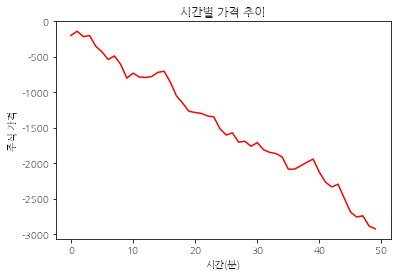

In [6]:
# 그래프를 그려보자. 이번에는 정상
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

## 1.konlpy 소개 및 설치  
설치 : pip install konlpy   #코랩은 cmd 따로 안 띄워도 됨  
웹 사이트 : https://konlpy.org/ko/latest/ (https://konlpy.org/ko/latest/)  
KoNLPy는 파이썬 프로그래밍 언어로 사용이 가능.  

In [7]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 6.5 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 448 kB 49.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
import konlpy

In [9]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

## 2. 꼬꼬마를 이용한 분석
1) 문장 분석    
2) 명사 분석     
3) 형태소 분석    

###1)문장분석 sentences

In [21]:
from konlpy.tag import Kkma
k = Kkma()
k.sentences("안녕하세요! 오늘은 한글 분석을 시작합니다.")

['안녕하세요!', '오늘은 한글 분석을 시작합니다.']

### 2)명사 분석 nouns    
어휘 분석을 통해 그 사람의 어휘력을 테스트하고 어떻게 끌어 올려줄 수 있을지 판단할 수 있다.   
형용사, 동사, 명사 등등 몇개를 쓰는지 

In [11]:
k.nouns("안녕하세요! 오늘은 한글 분석을 시작합니다.")


['안녕', '오늘', '한글', '분석']

### 3)형태소 분석
http://kkma.snu.ac.kr/documents/index.jsp?doc=postag (http://kkma.snu.ac.kr/    documents/index.jsp?  
doc=postag) : 한글 형태소 분석기 품사 태그표  
(예) NNG : 일반 명사, XSV : 동사 파생 접미사, EFN : 평서형 종결 어미  

In [12]:
k.pos("안녕하세요! 오늘은 한글 분석을 시작합니다.")

[('안녕', 'NNG'),
 ('하', 'XSV'),
 ('세요', 'EFN'),
 ('!', 'SF'),
 ('오늘', 'NNG'),
 ('은', 'JX'),
 ('한글', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

### 실습1

In [13]:
text = ("만약 우리나라 수도가 2016년 세종시로 바뀌었다면 지금 어떻게 사회가 변화했을까?")
k.nouns("만약 우리나라 수도가 2016년 세종시로 바뀌었다면 지금 어떻게 사회가 변화했을까?")

['만약',
 '우리',
 '우리나라',
 '나라',
 '수도',
 '2016',
 '2016년',
 '년',
 '세종',
 '세종시',
 '시',
 '사회',
 '변화']

In [14]:
from konlpy.tag import Kkma
k = Kkma()

k.sentences("쉽게 조리할 수 있는 간편식도 마찬가지다. 생선, 육류 등 간편구이 제품은 비가 오지 않은 날보다 판매량이 38% 많았다. 전(11%), 떡볶이(10%), 견과류(12%), 건어물(8%), 건조육(6%) 등도 비 온 날 더 많이 판매됐다. 마켓컬리 관계자는 비가 오면 외식보다는 집에서 식사하는 경우가 많아 요리할 때 필요한 주방용품, 쉽게 조리할 수 있는 간편식에 대한 소비자 관심이 높아졌다고 분석했다.")


['쉽게 조리할 수 있는 간편 식도 마찬가지다.',
 '생선, 육류 등 간편 구이 제품은 비가 오지 않은 날보다 판매량이 38% 많았다.',
 '전 (11%), 떡볶이 (10%), 견과류 (12%), 건어물 (8%), 건조 육 (6%) 등도 비 온 날 더 많이 판매됐다.',
 '마켓 컬 리 관계자는 비가 오면 외식보다는 집에서 식사하는 경우가 많아 요리할 때 필요한 주방용품, 쉽게 조리할 수 있는 간편 식에 대한 소비자 관심이 높아 졌다고',
 '분석했다.']

In [15]:
k.nouns("쉽게 조리할 수 있는 간편식도 마찬가지다. 생선, 육류 등 간편구이 제품은 비가 오지 않은 날보다 판매량이 38% 많았다. 전(11%), 떡볶이(10%), 견과류(12%), 건어물(8%), 건조육(6%) 등도 비 온 날 더 많이 판매됐다. 마켓컬리 관계자는 비가 오면 외식보다는 집에서 식사하는 경우가 많아 요리할 때 필요한 주방용품, 쉽게 조리할 수 있는 간편식에 대한 소비자 관심이 높아졌다고 분석했다.")


['조리',
 '수',
 '간편',
 '간편식',
 '식',
 '마찬가지',
 '생선',
 '육류',
 '등',
 '간편구이',
 '구이',
 '제품',
 '비',
 '날',
 '판매량',
 '38',
 '11',
 '떡볶이',
 '10',
 '견과',
 '12',
 '건어물',
 '8',
 '건조',
 '건조육',
 '육',
 '6',
 '판매',
 '마켓',
 '리',
 '관계자',
 '외식',
 '집',
 '식사',
 '경우',
 '요리',
 '때',
 '필요',
 '주방',
 '주방용품',
 '용품',
 '소비자',
 '관심',
 '분석']

In [16]:
k.pos("쉽게 조리할 수 있는 간편식도 마찬가지다. 생선, 육류 등 간편구이 제품은 비가 오지 않은 날보다 판매량이 38% 많았다. 전(11%), 떡볶이(10%), 견과류(12%), 건어물(8%), 건조육(6%) 등도 비 온 날 더 많이 판매됐다. 마켓컬리 관계자는 비가 오면 외식보다는 집에서 식사하는 경우가 많아 요리할 때 필요한 주방용품, 쉽게 조리할 수 있는 간편식에 대한 소비자 관심이 높아졌다고 분석했다.")

[('쉽', 'VA'),
 ('게', 'ECD'),
 ('조리', 'NNG'),
 ('하', 'XSV'),
 ('ㄹ', 'ETD'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('는', 'ETD'),
 ('간편', 'NNG'),
 ('식', 'NNG'),
 ('도', 'JX'),
 ('마찬가지', 'NNG'),
 ('이', 'VCP'),
 ('다', 'EFN'),
 ('.', 'SF'),
 ('생선', 'NNG'),
 (',', 'SP'),
 ('육류', 'NNG'),
 ('등', 'NNB'),
 ('간편', 'NNG'),
 ('구이', 'NNG'),
 ('제품', 'NNG'),
 ('은', 'JX'),
 ('비', 'NNG'),
 ('가', 'JKS'),
 ('오', 'VV'),
 ('지', 'ECD'),
 ('않', 'VXV'),
 ('은', 'ETD'),
 ('날', 'NNG'),
 ('보다', 'JKM'),
 ('판매량', 'NNG'),
 ('이', 'JKS'),
 ('38', 'NR'),
 ('%', 'SW'),
 ('많', 'VA'),
 ('았', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF'),
 ('저', 'VV'),
 ('ㄴ', 'ETD'),
 ('(', 'SS'),
 ('11', 'NR'),
 ('%', 'SW'),
 (')', 'SS'),
 (',', 'SP'),
 ('떡볶이', 'NNG'),
 ('(', 'SS'),
 ('10', 'NR'),
 ('%', 'SW'),
 (')', 'SS'),
 (',', 'SP'),
 ('견과', 'NNG'),
 ('류', 'XSN'),
 ('(', 'SS'),
 ('12', 'NR'),
 ('%', 'SW'),
 (')', 'SS'),
 (',', 'SP'),
 ('건어물', 'NNG'),
 ('(', 'SS'),
 ('8', 'NR'),
 ('%', 'SW'),
 (')', 'SS'),
 (',', 'SP'),
 ('건조', 'NNG'),
 ('육', 'NNG'),
 ('(

In [17]:
from konlpy.tag import Hannanum

han = Hannanum()


k.sentences("쉽게 조리할 수 있는 간편식도 마찬가지다. 생선, 육류 등 간편구이 제품은 비가 오지 않은 날보다 판매량이 38% 많았다. 전(11%), 떡볶이(10%), 견과류(12%), 건어물(8%), 건조육(6%) 등도 비 온 날 더 많이 판매됐다. 마켓컬리 관계자는 비가 오면 외식보다는 집에서 식사하는 경우가 많아 요리할 때 필요한 주방용품, 쉽게 조리할 수 있는 간편식에 대한 소비자 관심이 높아졌다고 분석했다.")

['쉽게 조리할 수 있는 간편 식도 마찬가지다.',
 '생선, 육류 등 간편 구이 제품은 비가 오지 않은 날보다 판매량이 38% 많았다.',
 '전 (11%), 떡볶이 (10%), 견과류 (12%), 건어물 (8%), 건조 육 (6%) 등도 비 온 날 더 많이 판매됐다.',
 '마켓 컬 리 관계자는 비가 오면 외식보다는 집에서 식사하는 경우가 많아 요리할 때 필요한 주방용품, 쉽게 조리할 수 있는 간편 식에 대한 소비자 관심이 높아 졌다고',
 '분석했다.']

##3. 말뭉치(corpus) 사용해 보기
kolaw : 한국 법률 말뭉치 : constitution.txt  
kobill : 대한민국 국회 의안 말뭉치. 파일 ID는 의안 번호를 의미  
1809890.txt ~ 1809899.txt  

In [18]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
print( c[:15])

대한민국헌법

유구한 역사와


In [20]:
from konlpy.corpus import kobill
d = kobill.open('1809890.txt').read()
print( d[:20])

지방공무원법 일부개정법률안

(정의화
